# Challenge 1: Binary Detection 1

The first step is to import relevant libraries.

In [112]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import random
from scipy.stats import multivariate_normal

The second step is to import data from the given file.

In [113]:
df = pd.DataFrame.from_csv("1challenge.csv")
df0 = df.loc[df['label'] == 1.0]
df1 = df.loc[df['label'] == 0.0]
dftest = df.loc[~((df['label'] == 0.0) | (df['label'] == 1.0))]
print(df.shape)
print(df0.shape)
print(df1.shape)
print(dftest.shape)

(15000, 3)
(4000, 3)
(6000, 3)
(5000, 3)


One can use the data in their original Pandas DataFrame format, or one can transform these objects into Numpy-arrays.

In [116]:
TrainingData0 = df0.as_matrix(columns=None)
TrainingData1 = df1.as_matrix(columns=None)
TestData = dftest.as_matrix(columns=['Y0', 'Y1'])

It may be helpful to visualize the data.

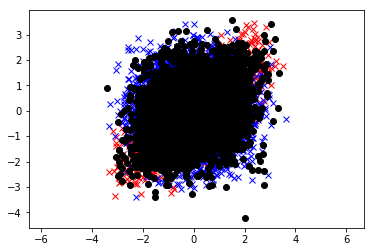

(4000, 3)


In [117]:
plt.plot(TrainingData0[:,0], TrainingData0[:,1], 'x', color='r')
plt.plot(TrainingData1[:,0], TrainingData1[:,1], 'x', color='b')
plt.plot(TestData[:,0], TestData[:,1], 'o', color='k')
plt.axis('equal')
plt.show()
print(TrainingData0.shape)

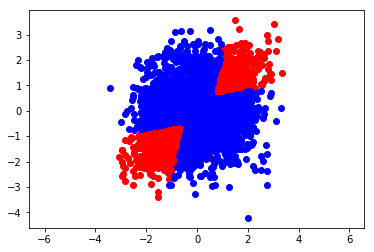

In [118]:
eta = df0.shape[0]/(df1.shape[0])

cov0 = np.cov(TrainingData0[:,0],TrainingData0[:,1])    # covariance matrix of label 0 data
cov1 = np.cov(TrainingData1[:,0],TrainingData1[:,1])    # covariance matrix of label 1 data
mean0 = np.mean(TrainingData0, axis = 0)[0:2]  # mean of label 0 data
mean1 = np.mean(TrainingData1, axis = 0)[0:2]  # mean of label 1 data

dist0 = multivariate_normal(mean0, cov0)          # create the multivariate gaussian distribution for label 0
dist1 = multivariate_normal(mean1, cov1)          # create the multivariate gaussian distribution for label 1

labels = np.zeros(TestData.shape[0])
for i in range(TestData.shape[0]):
    if dist1.pdf(TestData[i,0:2]) >= eta * dist0.pdf(TestData[i,0:2]):  # estimator to minimize errors
        labels[i] = 1
    else:
        labels[i] = 0
dftest['label'] = labels             # assign labels


# collect and convert test data for plot
dftest0 = dftest.loc[dftest['label'] == 0.0]
dftest1 = dftest.loc[dftest['label'] == 1.0]
TestData0 = dftest0.as_matrix(columns=None)
TestData1 = dftest1.as_matrix(columns=None)

plt.plot(TestData0[:,0], TestData0[:,1], 'o', color='r')
plt.plot(TestData1[:,0], TestData1[:,1], 'o', color='b')
plt.axis('equal')
plt.show()


In [119]:
# count training errors
train_errors = 0
for i in range(TrainingData0.shape[0]):
    if dist1.pdf(TrainingData0[i,0:2]) >= eta * dist0.pdf(TrainingData0[i,0:2]):
        train_errors += 1
for i in range(TrainingData1.shape[0]):
    if dist1.pdf(TrainingData1[i,0:2]) < eta * dist0.pdf(TrainingData1[i,0:2]):
        train_errors += 1
print (train_errors)

3494


After creating an algorithm and generating labels, one should update the original CSV file.

In [120]:
df = pd.concat([df0, df1, dftest], join='outer', ignore_index=True)
df.to_csv("1challenge_updated.csv")